<h2>In this notebook I will explain what <b>hierarchical clustering</b>, <b>PCA</b>, and <b>t-SNE</b> are.</h2>
    
<h3>Then, based on the outcomes, use K-Means algorithm to classify which countries need to be grouped together.</h3>


In [2]:
# First, import the necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import whiten

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

%matplotlib inline
sns.set()

In [46]:
# read the csv file 
eurovision = pd.read_csv('datasets/eurovision_ds.csv', index_col=0)
print(eurovision.head(3))

# add the missing values, since every country roots for themselves, it's logical to fill in the max score
eurovision.fillna(12, inplace=True)
print(eurovision.head(3))

# get the country names in one place (for labels in visualization)
countries = np.unique(eurovision.index) 

              Armenia  Australia  Austria  Azerbaijan  Belgium  Bulgaria  \
From country                                                               
Albania           2.0       12.0      0.0         0.0      0.0       8.0   
Armenia           NaN        0.0      4.0         0.0      0.0       0.0   
Australia         0.0        NaN      3.0         0.0     12.0      10.0   

              Croatia  Cyprus  Czech Republic  France  ...  Lithuania  Malta  \
From country                                           ...                     
Albania           0.0     0.0             0.0     0.0  ...        4.0    0.0   
Armenia           0.0     6.0             0.0     7.0  ...        0.0    5.0   
Australia         0.0     0.0             0.0     7.0  ...        1.0    6.0   

              Poland  Russia  Serbia  Spain  Sweden  The Netherlands  Ukraine  \
From country                                                                    
Albania          5.0     7.0     0.0    0.0     3.0     

In [47]:
# Check for missing data & possible solution to handle them

eurovision.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Albania to United Kingdom
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Armenia          42 non-null     float64
 1   Australia        42 non-null     float64
 2   Austria          42 non-null     float64
 3   Azerbaijan       42 non-null     float64
 4   Belgium          42 non-null     float64
 5   Bulgaria         42 non-null     float64
 6   Croatia          42 non-null     float64
 7   Cyprus           42 non-null     float64
 8   Czech Republic   42 non-null     float64
 9   France           42 non-null     float64
 10  Georgia          42 non-null     float64
 11  Germany          42 non-null     float64
 12  Hungary          42 non-null     float64
 13  Israel           42 non-null     float64
 14  Italy            42 non-null     float64
 15  Latvia           42 non-null     float64
 16  Lithuania        42 non-null     float64
 17  Malta

### Hierarchical Clustering
<h3>Key ideas:</h3> visualization, insights, dendrograms, linkage

Hierarchical Clustering, also known as agglomerative clustering, is a bottom-up technique where each value
starts with a single value (leaf). Later on, the algorithm finds similar values to make up clusters (nodes) repeatedly. At the end, there's one big clust When to use
this method? When you have no idea how many clusters are needed. It's not going to give an answer rightaway, instead,
it will give more sense and insights on the dataset you're working on.

<h3> Advantages </h3>
<li> easy to implement </li>
<li> shows the correlations and clusters at each step (therefore, you can see clearly see which values are getting clustered</li>
<li> can get a sense of how many clusters are needed for the model </li>
<li> gives insight on the dataset </li>
<li> you can see where the distance gets too big (<b>potential cluster number</b>)

<h3> Disadvantages </h3>
<li> doesn't give a direct answer </li>


<h3>Important to remember: </h3>
<li>mainly uses Eucledian distance $\sqrt{(difference-in-sample1)^2 + ... + (difference-in-sampleN)^2}$</li>
<li>works with <b>scipy's</b> dendrogram* & linkage</li>

*dendrogram are a type of visual representation. It is a tree-based representation that shows <b>how</b> the values get clustered. 

### Trial without normalization

There are different methods in <b>linkage</b> function; 

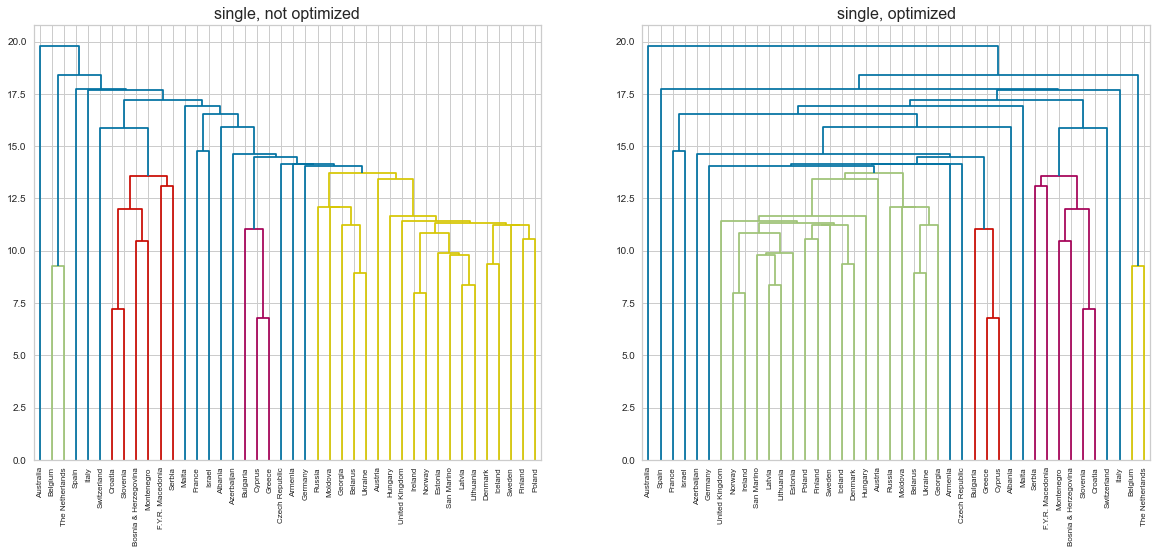

In [48]:
# Since I will plot the dataset multiple times, it's better to create a function for it. 

def plot_clusters(ds1, ds2, method, 
                 label=countries, rotation=90, font_size=10):
    """
    
    """    
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    dendr1 = dendrogram(ds1, labels=countries, ax=ax[0], orientation='top')
    ax[0].set_title(f'{method}, not optimized', fontsize=16)
    dendr2 = dendrogram(ds2, labels=countries, ax=ax[1], orientation='top')
    ax[1].set_title(f'{method}, optimized', fontsize=16)
    plt.show()



eurovision_vals = eurovision.values
mergings1 = linkage(eurovision_vals, method='single')

# try with "optimal_ordering" to see if there're any changes
mergings2 = linkage(eurovision_vals, method='single', optimal_ordering=True)

plot_clusters(mergings1, mergings2, method='single')


<h3>We can clearly see that 'single' method has way too many clusters and looks messy. Let's try different ones: complete, weighted & centroid</h3>

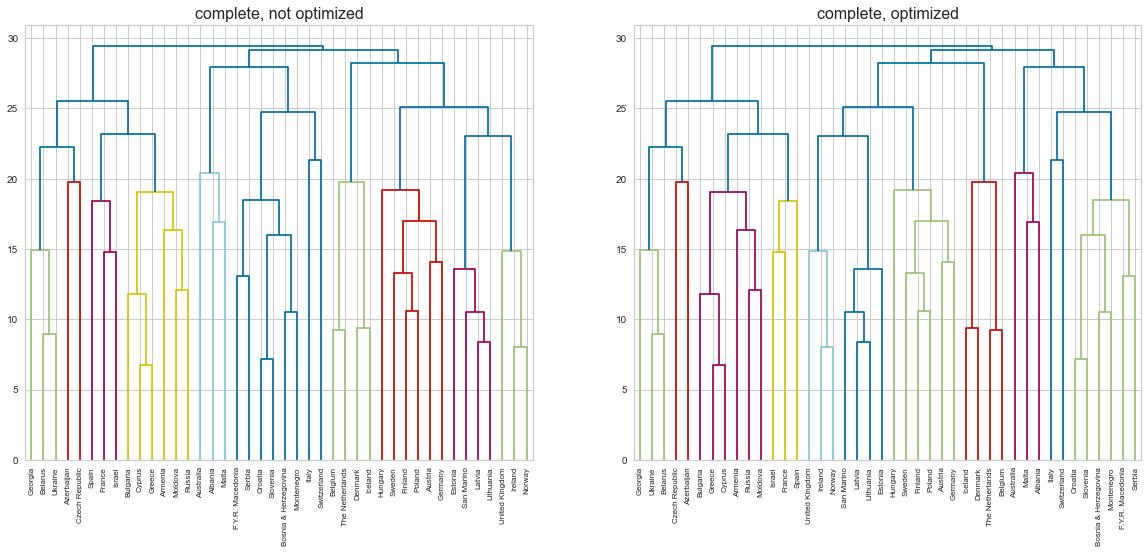

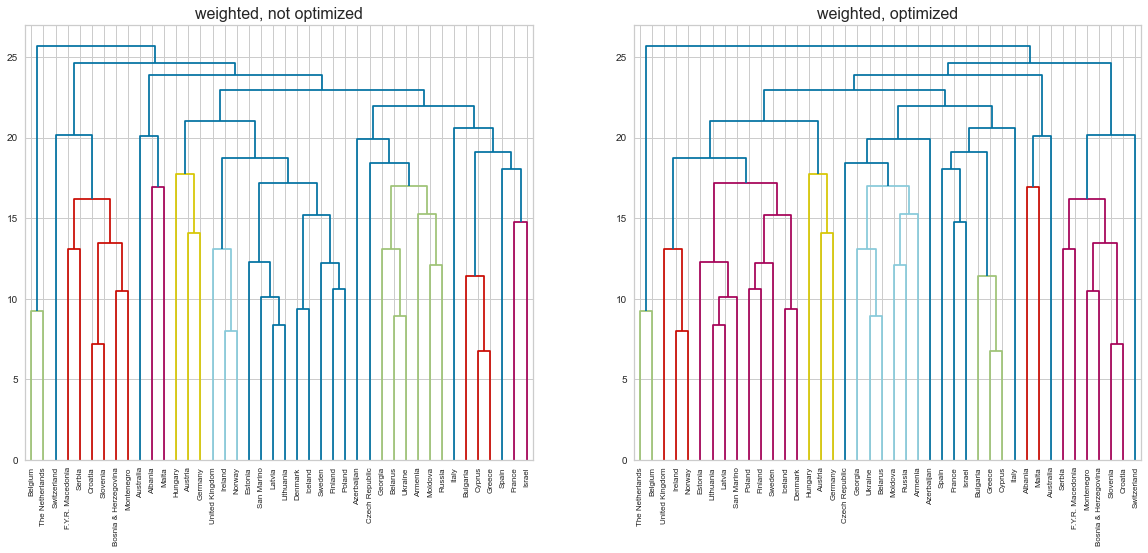

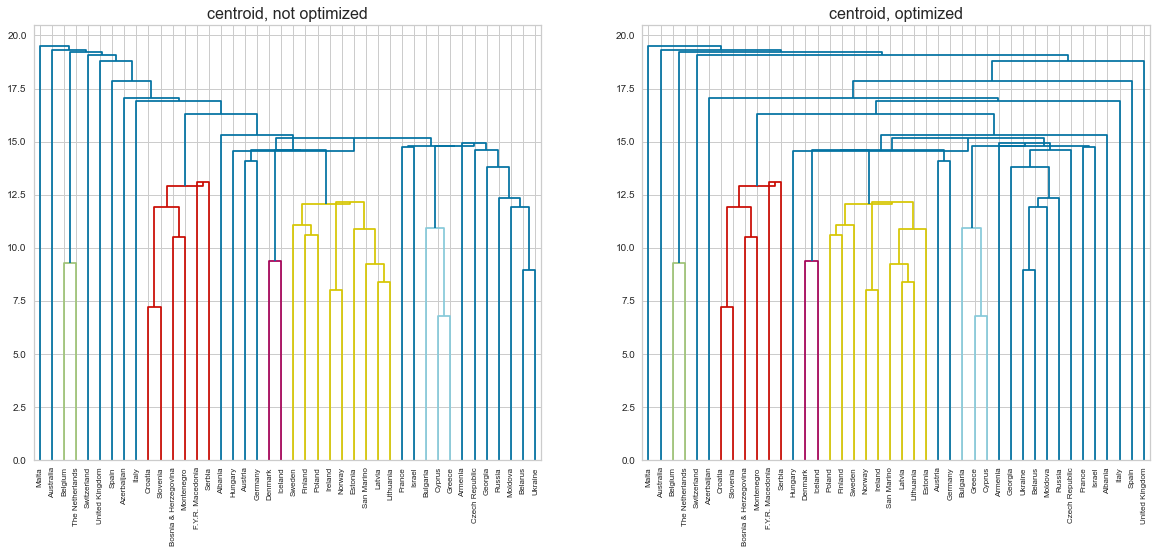

In [49]:
# complete without optimal ordering
mergings1 = linkage(eurovision_vals, method='complete')

# complete with optimal ordering
mergings2 = linkage(eurovision_vals, method='complete', optimal_ordering=True)
plot_clusters(mergings1, mergings2, method='complete')

# =================================

# weighted without optimal ordering
mergings1 = linkage(eurovision_vals, method='weighted')

# weighted with optimal ordering
mergings2 = linkage(eurovision_vals, method='weighted', optimal_ordering=True)
plot_clusters(mergings1, mergings2, method='weighted')

# =================================

# centroid without optimal ordering
mergings1 = linkage(eurovision_vals, method='centroid')

# weighted with optimal ordering
mergings2 = linkage(eurovision_vals, method='centroid', optimal_ordering=True)
plot_clusters(mergings1, mergings2, method='centroid')


<h3>Phew, that was a lot of visualization!</h3>
However, we can see that "optimal" ordering is not that optimal. The best clustering is clustering with weighted method. We can "cut-off" the clusters at ~22 to get 6 clusters in total

### Trial with normalization

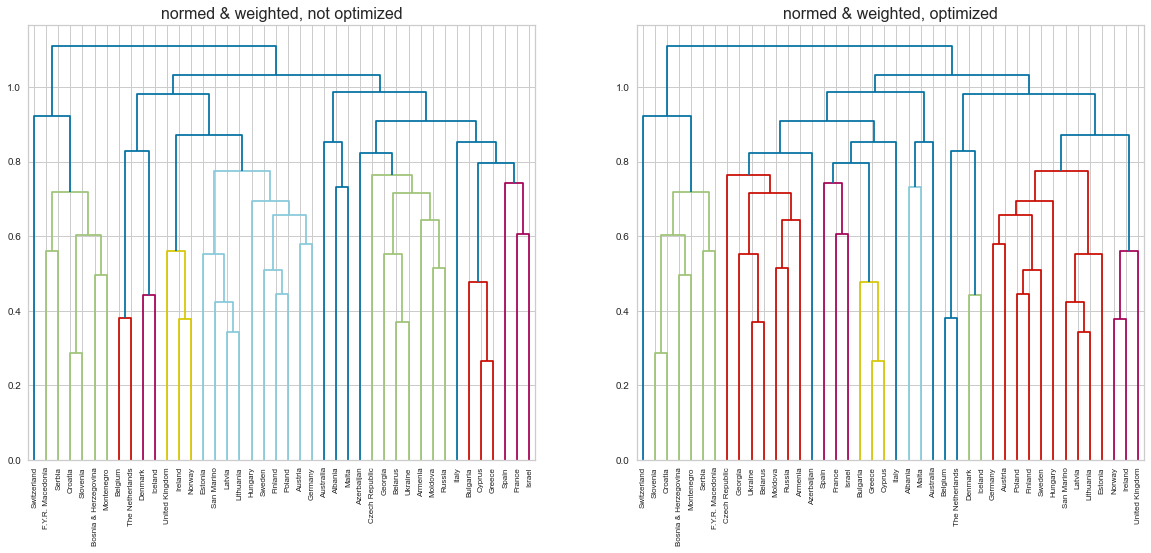

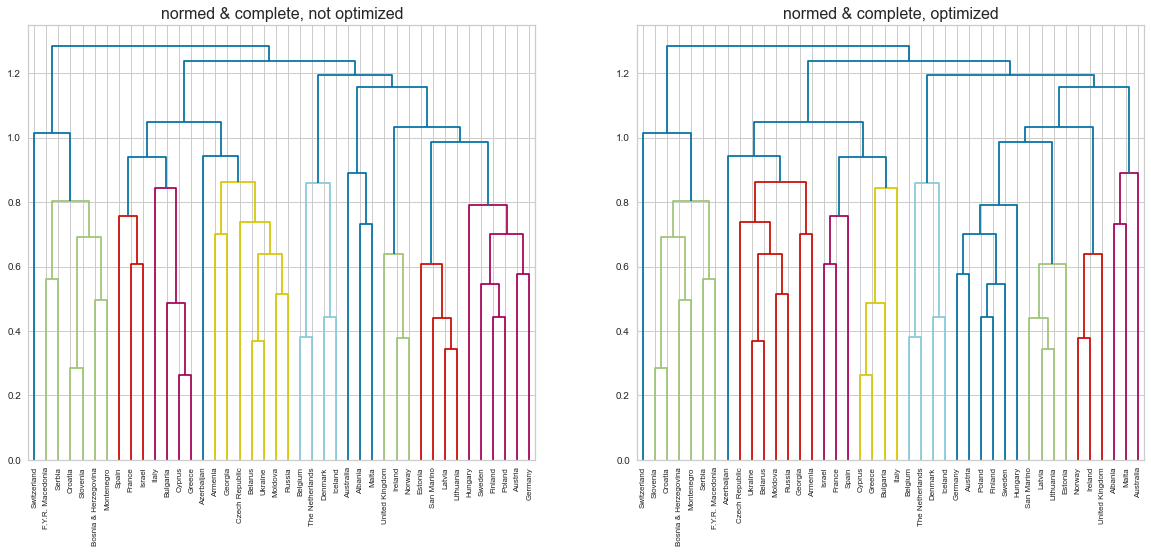

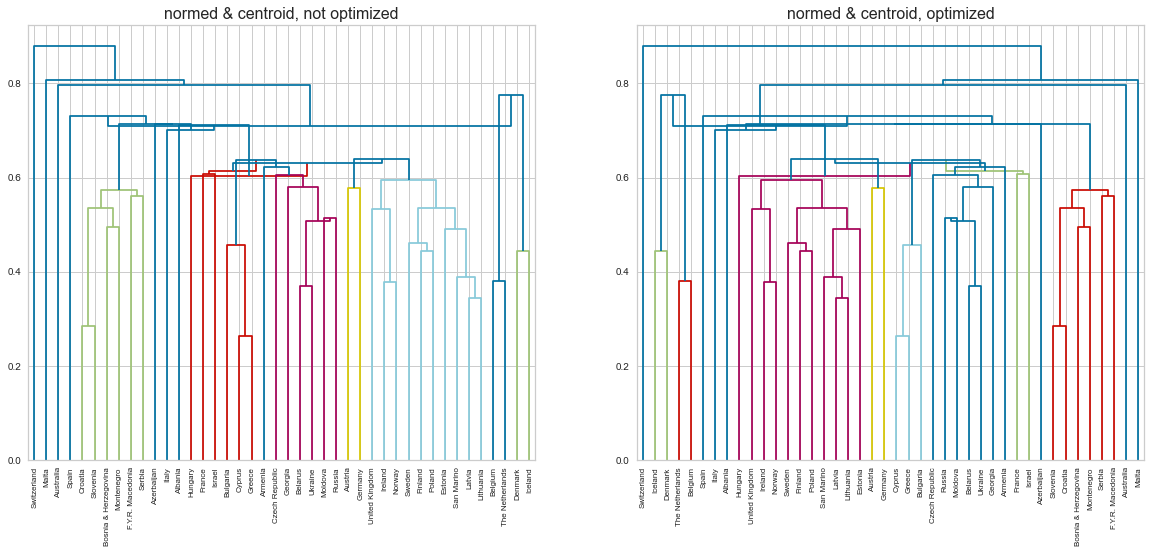

In [50]:
from sklearn.preprocessing import normalize

normalized = normalize(eurovision.values)
mergings_norm = linkage(normalized, method='weighted')
mergings_norm2 = linkage(normalized, method='weighted', optimal_ordering=True)
plot_clusters(mergings_norm, mergings_norm2, method='normed & weighted')

# =================================

# normalized & complete
# complete without optimal ordering
mergings_norm = linkage(normalized, method='complete')

# complete with optimal ordering
mergings_norm2 = linkage(normalized, method='complete', optimal_ordering=True)
plot_clusters(mergings_norm, mergings_norm2, method='normed & complete')


# =================================
# normalized & complete
# complete without optimal ordering
mergings_norm = linkage(normalized, method='centroid')

# complete with optimal ordering
mergings_norm2 = linkage(normalized, method='centroid', optimal_ordering=True)
plot_clusters(mergings_norm, mergings_norm2, method='normed & centroid')



<h3>KMeans & Elbow Method</h3>

<b>Elbow method (Scree plot)</b> is  away to compare different clusters and how they affect inertia (sum of squarred error). As always, we need to minimize it. Over here, we see that the 'elbow' happens at three clusters. 

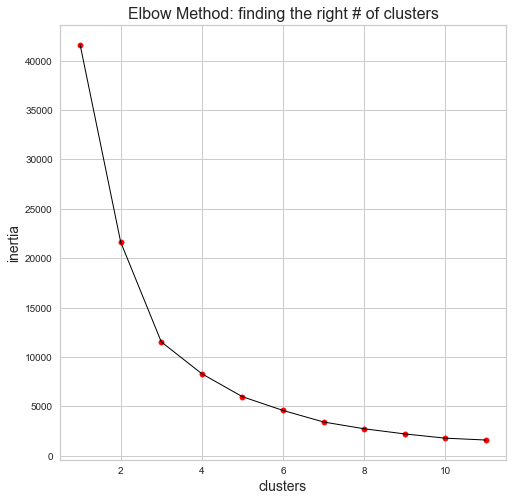

In [26]:
from sklearn.cluster import KMeans

# elbow method
clusters = np.arange(1, 12)
results = np.zeros(len(clusters))

# iterate and visualize the difference with different clusters
for idx, cluster in enumerate(clusters):
    kmeans = KMeans(n_clusters=cluster, max_iter=1000).fit(mergings_norm)
    results[idx] = kmeans.inertia_

# visualize the inertias & clusters
plt.figure(figsize=(8, 8))
plt.title('Elbow Method: finding the right # of clusters', fontsize=16)
plt.scatter(clusters, results, color='red', s=30)
plt.plot(clusters, results, color='black', linewidth=1)
plt.xlabel('clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.show()

<h3>Silhouette plot with clusters: 2 - 4</h3>
Since KMeans doesn't let you see the score, Silhouette plot to the rescue! We can both visualize clusters and see the score. In the elbow method above, it's obvious that we need to use three clusters. But how accurate is it? Let's see the scores for them. 

I'm using yellowbrick's SilhouetteVisualizer since it's easier to implement and gives all the information visually. As we can see, the number of clusters corresponds with KMeans' one. Therefore, we should use three clusters. 

<b>IMPORTANT</b>: the vertical line shows the score!

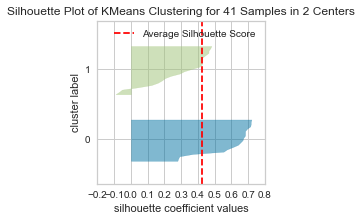

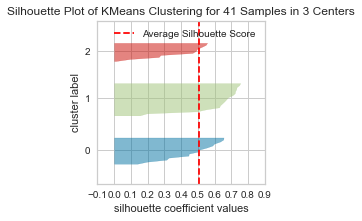

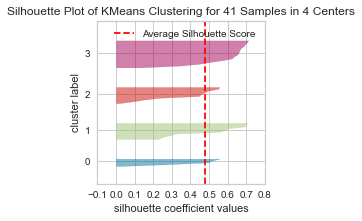

In [23]:
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

for idx in range(2, 5):
    kmeans = KMeans(n_clusters=idx, random_state=10)
    plt.figure(figsize=(3, 3))

    # Compute the silhouette scores for each sample
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(mergings_norm)
    visualizer.show()
    

<h3>Time to take a look at PCA, huh?</h3>
PCA, or Principal Component Analysis, is my favorite technique. This method is used for dimensionality reduction; it selects the important components that have the biggest impact on the dataset (<b>without losing the important information</b>). Therefore, it shows which features have to be kicked out. What makes even cooler is that we can take as many dimensions as input, and it will output a 2D array. Therefore, we have a possibility to <b>VISUALIZE</b> it! (it stesses me out when I can't visualize everything).

So, how does PCA work? First, we need to center it around origin (0, 0) using sklearn's preprocessing.scale or StandardScaler. Then, feed the results to PCA so it would find the best-fitting line that crosses all of the dimensions. It uses eigenvalues to calculate the distance between a predicted line & components. 

<h3>In this case, unfortunately, PCA is not going to help.</h3> The correlation matrix reveals that the majority of correlations are less than the threshold (0.3 for PCA to work). Neverthless, let's look at it anyways & show that it won't work.


Armenia            0.019551
Australia         -0.007515
Austria            0.006754
Azerbaijan         0.011961
Belgium           -0.001884
Bulgaria           0.028234
Croatia           -0.024845
Cyprus             0.008854
Czech Republic     0.022384
France             0.022327
Georgia            0.024766
Germany            0.009870
Hungary            0.028167
Israel             0.027583
Italy              0.000956
Latvia            -0.008236
Lithuania         -0.021484
Malta              0.039277
Poland             0.006215
Russia             0.021182
Serbia            -0.028300
Spain              0.025859
Sweden            -0.024206
The Netherlands   -0.001947
Ukraine            0.029740
United Kingdom     0.022310
dtype: float64


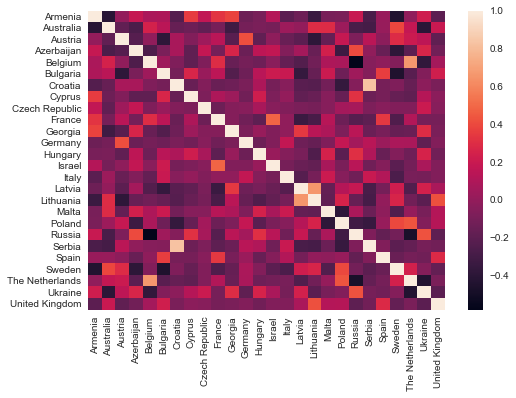

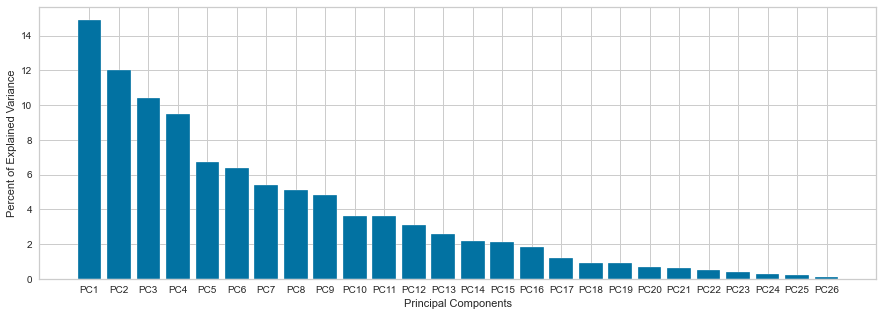

In [45]:
# using seaborn's heatmap show the correlations
sns.heatmap(eurovision.corr())

# for verbal representation, let's also show the means of each country
print(eurovision.corr().mean())

# First, we need to standardize the data, then apply PCA (it's required to do so, since PCA always has to be centered at origin)
scale = StandardScaler()
pca = PCA()

# Second, create a pipeline to avoid the hustle of fitting & transforming
pipeline = make_pipeline(scale, pca).fit_transform(eurovision.values)
percent_variation = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Third, create the necessary labels for visualization
labels = ['PC' + str(x) for x in range(1, len(percent_variation) + 1)]   # show how many PCs there are
variations = pd.DataFrame({'PC': labels, 'percent': percent_variation})  # show the percentage of each PC

# Finally, visualize it
plt.figure(figsize=(15, 5))
plt.bar(x=range(1, len(percent_variation) + 1), height=percent_variation, tick_label=labels)
plt.ylabel('Percent of Explained Variance')
plt.xlabel('Principal Components')
plt.title('', fontsize=16)
plt.show()
